In [1]:
# %% Importing libraries

import pickle
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# %%  Extracting train data

train_file = 'train.p'
train_obj = open(train_file, 'rb')
train_data = pickle.load(train_obj)
train_data


{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'labels': array([41, 41, 41, ..., 25, 25, 25], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
  

In [5]:
# %%  Extracting test data

test_file = 'test.p'
test_obj = open(test_file, 'rb')
test_data = pickle.load(test_obj)
test_data


{'sizes': array([[53, 54],
        [42, 45],
        [48, 52],
        ...,
        [29, 29],
        [48, 49],
        [32, 31]], dtype=uint8),
 'coords': array([[ 6,  5, 48, 49],
        [ 5,  5, 36, 40],
        [ 6,  6, 43, 47],
        ...,
        [ 6,  6, 24, 24],
        [ 5,  6, 43, 44],
        [ 6,  5, 27, 26]], dtype=uint8),
 'features': array([[[[116, 139, 174],
          [116, 137, 171],
          [118, 138, 172],
          ...,
          [ 98, 114, 143],
          [ 97, 121, 147],
          [ 85, 105, 130]],
 
         [[115, 142, 176],
          [115, 140, 174],
          [117, 141, 175],
          ...,
          [119, 143, 176],
          [120, 141, 173],
          [120, 139, 171]],
 
         [[117, 141, 174],
          [117, 142, 175],
          [114, 140, 172],
          ...,
          [120, 144, 179],
          [122, 144, 179],
          [120, 143, 177]],
 
         ...,
 
         [[117, 137, 167],
          [115, 134, 164],
          [117, 135, 164],
          ..

In [6]:
# %%  Extracting valid data

valid_file = 'valid.p'
valid_obj = open(valid_file, 'rb')
valid_data = pickle.load(valid_obj)
valid_data


{'coords': array([[  6,   5,  22,  20],
        [  6,   5,  22,  20],
        [  6,   5,  23,  21],
        ...,
        [ 10,   8,  99,  90],
        [ 10,  11, 112, 108],
        [ 13,  12, 138, 125]], dtype=uint8),
 'labels': array([41, 41, 41, ..., 25, 25, 25], dtype=uint8),
 'features': array([[[[13, 12, 12],
          [12, 11, 12],
          [13, 11, 11],
          ...,
          [14, 12, 11],
          [13, 12, 11],
          [12, 12, 11]],
 
         [[13, 12, 13],
          [12, 11, 12],
          [13, 12, 12],
          ...,
          [13, 12, 11],
          [13, 12, 11],
          [12, 12, 11]],
 
         [[13, 12, 13],
          [12, 11, 12],
          [12, 12, 12],
          ...,
          [13, 12, 11],
          [13, 12, 11],
          [12, 12, 11]],
 
         ...,
 
         [[16, 15, 15],
          [15, 14, 14],
          [15, 15, 15],
          ...,
          [13, 12, 12],
          [14, 13, 13],
          [14, 13, 13]],
 
         [[18, 16, 16],
          [17, 15, 1

In [8]:
# %%  Extracting training feature and training labels

train_features = train_data['features']
train_labels = train_data['labels']

# %%  Extracting testing feature and testing labels

test_features = test_data['features']
test_labels = test_data['labels']

# %%  Extracting valid feature and testing labels

valid_features = valid_data['features']
valid_labels = valid_data['labels']


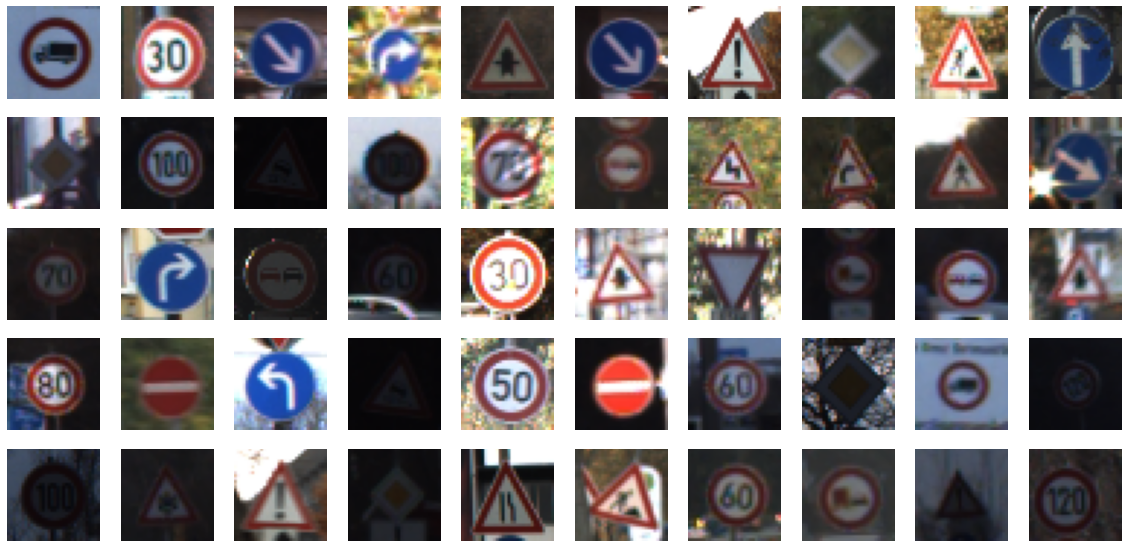

In [11]:
#%%  Verify the data

class_names = str(list(train_features)) # You can also take train_lables instead of it
class_names = list(class_names)

plt.figure(figsize=(20,20))
for i in range(50):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.axis('off')
    plt.imshow(test_features[i])  # cmap=plt.get_cmap('gray')
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[i])
plt.show()


In [13]:
# %%  Converting into float 

x_train = train_features.astype('float32')
x_test = test_features.astype('float32')
x_valid = valid_features.astype('float32')



In [14]:
# %%  Normalizing 0 to 1

x_train /= 255
x_test /= 255
x_valid /= 255 


In [15]:
y_train = train_labels
y_test = test_labels
y_valid = valid_labels

In [12]:
# %%   Import TensorFlow

import keras
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D , Dense, Input ,Dropout, Flatten
from keras.preprocessing import image


Using TensorFlow backend.


In [16]:
# %%   Create the convolutional base

input_x = Input(shape=(32,32,3))
layer_1 = Conv2D(32, kernel_size=(3,3), activation='relu') (input_x)
layer_2 = MaxPooling2D((2, 2))(layer_1)

layer_3 = Dropout(0.5) (layer_2) # To prevent overfitting

layer_4 = Flatten() (layer_3)
layer_5 = Dense(150, activation='relu') (layer_4)
layer_6 = Dense(80, activation='relu') (layer_5)
layer_7 = Dense(43, activation='softmax') (layer_6)

In [18]:
# %%  Displaying the architecture of model

model = Model(input_x, layer_7)
model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               1080150   
_________________________________________________________________
dense_2 (Dense)              (None, 80)                1208

In [19]:
# %%  Compile and train the model


model.compile(
    optimizer='Adam',
    # optimizer='Adadelta',
    # loss=keras.losses.categorical_crossentropy,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )
    
model.fit(
    x_train,
    y_train, 
    epochs=10,
    batch_size=200,
    validation_data=(x_valid, y_valid ),
    # validation_data=(valid_test, y_test )
    shuffle=True
    )


Train on 34799 samples, validate on 4410 samples
Epoch 1/10
34799/34799 [==============================] - 44s 1ms/step - loss: 1.8452 - accuracy: 0.5203 - val_loss: 1.1447 - val_accuracy: 0.6748
Epoch 2/10
34799/34799 [==============================] - 41s 1ms/step - loss: 0.5708 - accuracy: 0.8466 - val_loss: 0.6909 - val_accuracy: 0.8088
Epoch 3/10
34799/34799 [==============================] - 41s 1ms/step - loss: 0.3306 - accuracy: 0.9119 - val_loss: 0.6163 - val_accuracy: 0.8224
Epoch 4/10
34799/34799 [==============================] - 41s 1ms/step - loss: 0.2323 - accuracy: 0.9403 - val_loss: 0.5340 - val_accuracy: 0.8503
Epoch 5/10
34799/34799 [==============================] - 42s 1ms/step - loss: 0.1806 - accuracy: 0.9527 - val_loss: 0.5023 - val_accuracy: 0.8601
Epoch 6/10
34799/34799 [==============================] - 42s 1ms/step - loss: 0.1504 - accuracy: 0.9610 - val_loss: 0.4913 - val_accuracy: 0.8701
Epoch 7/10
34799/34799 [==============================] - 42s 1ms/ste

In [23]:
# %%  Evaluate the score 

score = model.evaluate(x_test, y_test, verbose=0)

print('loss=', score[0])
print('accuracy=',score[1])

loss= 0.5763508087288078
accuracy= 0.8861441016197205


In [24]:
# %% labeling the positions

label_names = {
    0 : 'Speed limit 20km/h', 
    1 : 'Speed limit 30km/h',
    2 : 'Speed limit 50km/h',
    3 : 'Speed limit 60km/h',
    4 : 'Speed limit 70km/h' , 
    5 : 'Speed limit 80km/h',
    6 : 'End of speed limit 80km/h' ,
    7 : 'Speed limit 100km/h' , 
    8 : 'Speed limit 120km/h' , 
    9 : 'No passing',
    10 : 'No passing for vehicles over 3.5 metric tons',
    11 : 'Rightofway at the next intersection',
    12 : 'Priority road',
    13 : 'Yield' ,
    14 : 'Stop' ,
    15 : 'No vehicles',
    16 : 'Vehicles over 3.5 metric tons prohiited' ,
    17 : 'No entry',
    18 : 'General caution' ,
    19 : 'Dangerous curve to the left',
    20 : 'Dangerous curve to the right' ,
    21 : 'Doule curve',
    22 : 'umpy road' ,
    23 : 'Slippery road',
    24 : 'Road narrows on the right' ,
    25 : 'Road work',
    26 : 'Traffic signals' ,
    27 : 'Pedestrians' ,
    28 : 'Children crossing',
    29 : 'icycles crossing' ,
    30 : 'eware of ice/snow',
    31 : 'Wild animals crossing',
    32 : 'End of all speed and passing limits' ,
    33 : 'Turn right ahead',
    34 : 'Turn left ahead' ,
    35 : 'Ahead only' ,
    36 : 'Go straight or right',
    37 : 'Go straight or left' ,
    38 : 'Keep right' ,
    39 : 'Keep left',
    40 : 'Roundaout mandatory',
    41 : 'End of no passing',
    42 :'End of no passing y vehicles over 3.5 metric tons'
}



labels =label_names.values()
val = list(labels)


Enter a number here from 0 to 4410: 5
End of all speed and passing limits


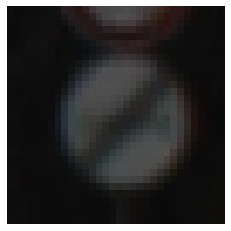

In [25]:
# %%  single value prediction

number = int(input('Enter a number here from 0 to 4410: '))

prediction = model.predict(x_valid)
warning = np.argmax(np.round(prediction[number]))
print(val[warning])

plt.axis('off')
plt.imshow(x_valid[number], cmap = plt.cm.binary)
plt.show()
